## Classificação um contra todos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

import sys, os
sys.path.append(os.path.abspath('..'))

# Classes e funções personalizadas
from models.PLA import PocketPLA
from models.LinReg import RegressaoLinear
from models.LogReg import RegressaoLogistica
from analysis.one_x_all import treinar_um_contra_todos, plot_um_contra_todos

In [2]:
train_redu = pd.read_csv("../dataset_digits/train_redu.csv")
test_redu  = pd.read_csv("../dataset_digits/test_redu.csv")

digitos_para_classificar = [0,1,4,5]
treino_filtrado = train_redu[train_redu['label'].isin(digitos_para_classificar)].copy()
teste_filtrado  = test_redu[test_redu['label'].isin(digitos_para_classificar)].copy()

display(treino_filtrado)
display(teste_filtrado)

,label,intensidade,simetria
0,0,145.435290,148.57256
1,0,118.576470,137.11372
2,0,127.600000,134.04706
3,0,138.047060,151.00392
4,0,146.215680,122.50196
...,...,...,...
2181,5,105.686270,133.89020
2182,5,113.050980,116.69804
2183,5,110.725490,133.01960
2184,5,99.305885,132.13333


,label,intensidade,simetria
0,0,147.933330,130.470580
1,0,131.054900,122.721565
2,0,134.890200,151.725500
3,0,139.976470,133.921570
4,0,129.580400,130.274500
...,...,...,...
1110,5,96.121570,139.521580
1111,5,98.439220,130.729420
1112,5,95.141174,122.227450
1113,5,106.882355,128.007840


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(treino_filtrado[['intensidade','simetria']])
X_test_scaled  = scaler.transform(teste_filtrado[['intensidade','simetria']])

y_train = treino_filtrado['label'].values
y_test  = teste_filtrado['label'].values

In [4]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

print(X_train_scaled)
print(X_test_scaled)

(2186, 2)
(1115, 2)
[[1.86292506 1.56065525]
 [0.91538941 1.10727991]
 [1.23372493 0.98594582]
 ...
 [0.63841956 0.94529379]
 [0.2355544  0.91022803]
 [0.30140731 1.27547229]]
[[1.95105186 0.84444041]
 [1.3556082  0.53784635]
 [1.49091137 1.68540306]
 ...
 [0.08863014 0.51829642]
 [0.50283998 0.74700074]
 [0.8823244  0.56391328]]



=== Modelo: PocketPLA ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       218
           1       1.00      1.00      1.00       292
           4       0.90      1.00      0.95       314
           5       0.98      0.87      0.92       291

    accuracy                           0.96      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.96      0.96      0.96      1115

[AVISO] Modelo do dígito 0 não possui coeficientes (w).
[AVISO] Modelo do dígito 1 não possui coeficientes (w).
[AVISO] Modelo do dígito 4 não possui coeficientes (w).


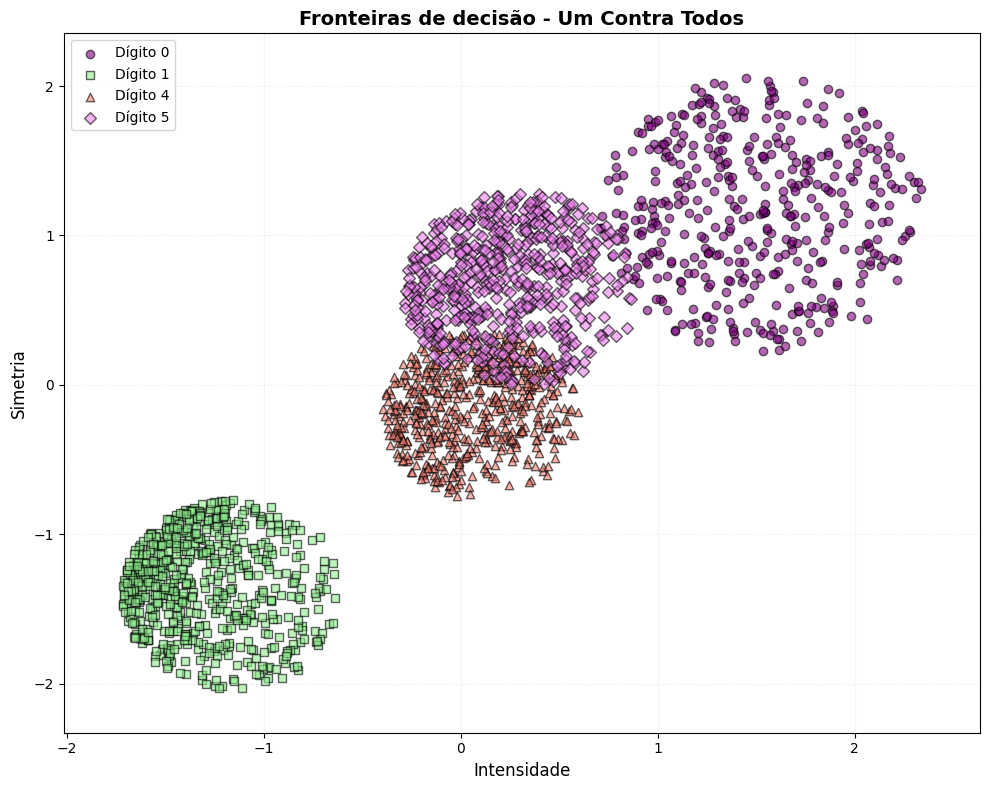

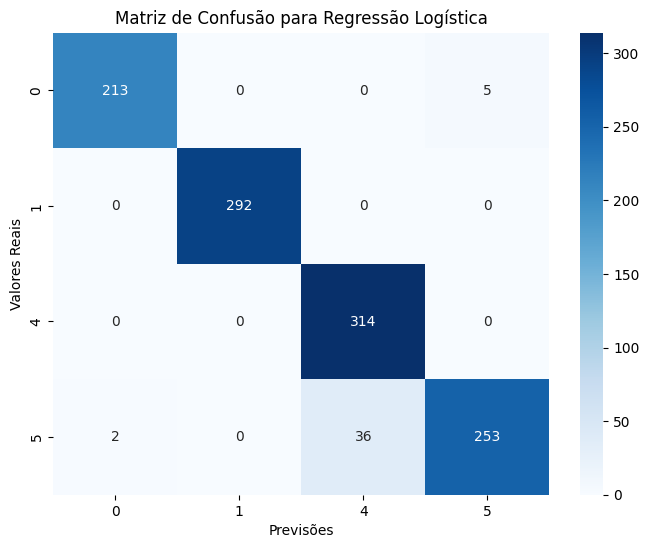

In [5]:
classificadores_perceptron, previsoes_perceptron = treinar_um_contra_todos(
    PocketPLA, X_train_scaled, y_train, X_test_scaled, y_test
)

plot_um_contra_todos(classificadores_perceptron, X_train_scaled, y_train, digitos_para_classificar)

cm = confusion_matrix(y_test, previsoes_perceptron, labels=digitos_para_classificar)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digitos_para_classificar, yticklabels=digitos_para_classificar)
plt.title('Matriz de Confusão para Regressão Logística')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


=== Modelo: RegressaoLinear ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       218
           1       0.00      0.00      0.00       292
           4       0.00      0.00      0.00       314
           5       0.26      1.00      0.41       291

    accuracy                           0.26      1115
   macro avg       0.07      0.25      0.10      1115
weighted avg       0.07      0.26      0.11      1115

[AVISO] Modelo do dígito 0 não possui coeficientes (w).
[AVISO] Modelo do dígito 1 não possui coeficientes (w).
[AVISO] Modelo do dígito 4 não possui coeficientes (w).


c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\pedro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

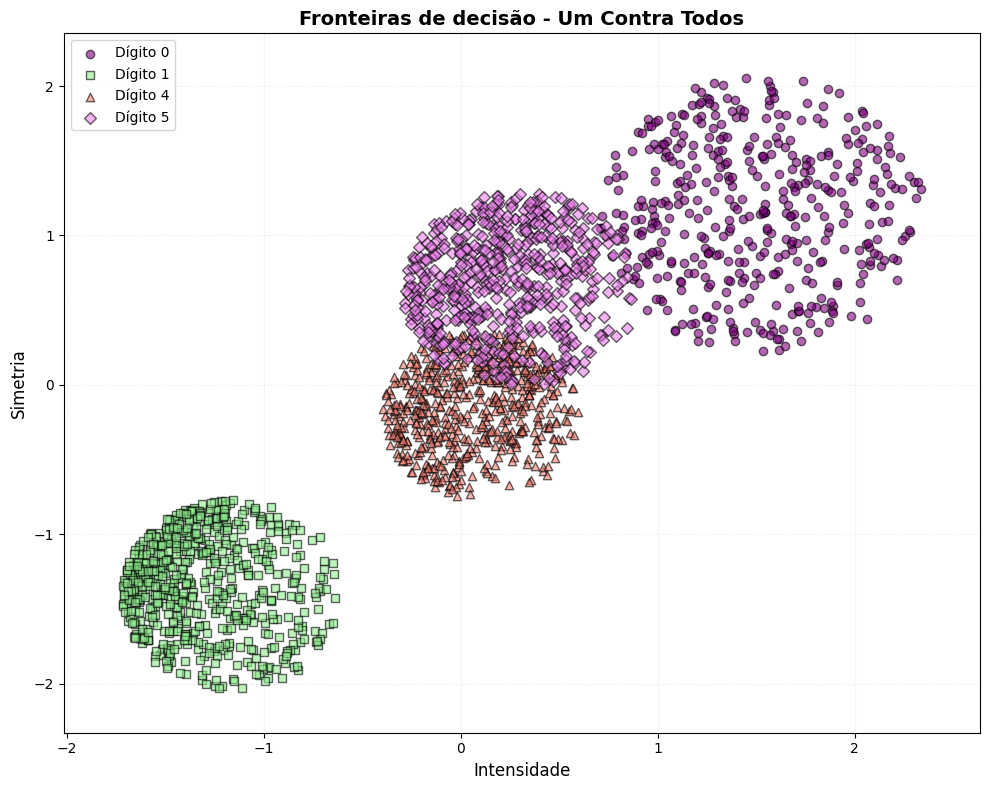

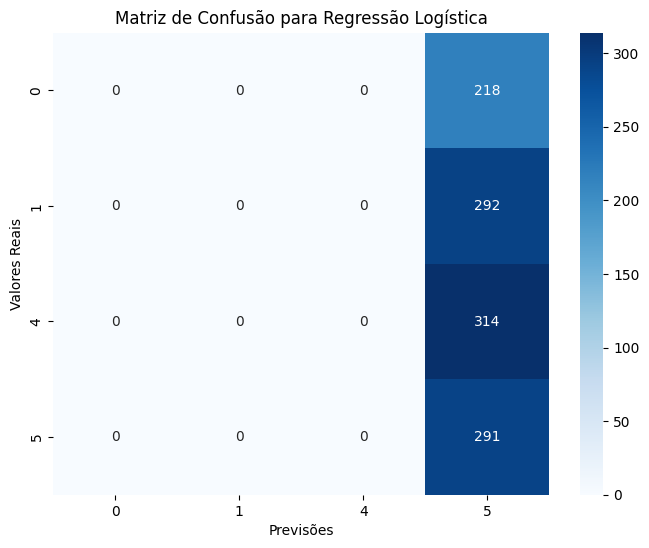

In [6]:
classificadores_linear, previsoes_linear = treinar_um_contra_todos(
    RegressaoLinear, X_train_scaled, y_train, X_test_scaled, y_test
)

plot_um_contra_todos(classificadores_linear, X_train_scaled, y_train, digitos_para_classificar)

cm = confusion_matrix(y_test, previsoes_linear, labels=digitos_para_classificar)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digitos_para_classificar, yticklabels=digitos_para_classificar)
plt.title('Matriz de Confusão para Regressão Logística')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()


=== Modelo: RegressaoLogistica ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       218
           1       1.00      1.00      1.00       292
           4       0.94      0.96      0.95       314
           5       0.92      0.93      0.92       291

    accuracy                           0.96      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.96      0.96      0.96      1115

[AVISO] Modelo do dígito 0 não possui coeficientes (w).
[AVISO] Modelo do dígito 1 não possui coeficientes (w).
[AVISO] Modelo do dígito 4 não possui coeficientes (w).


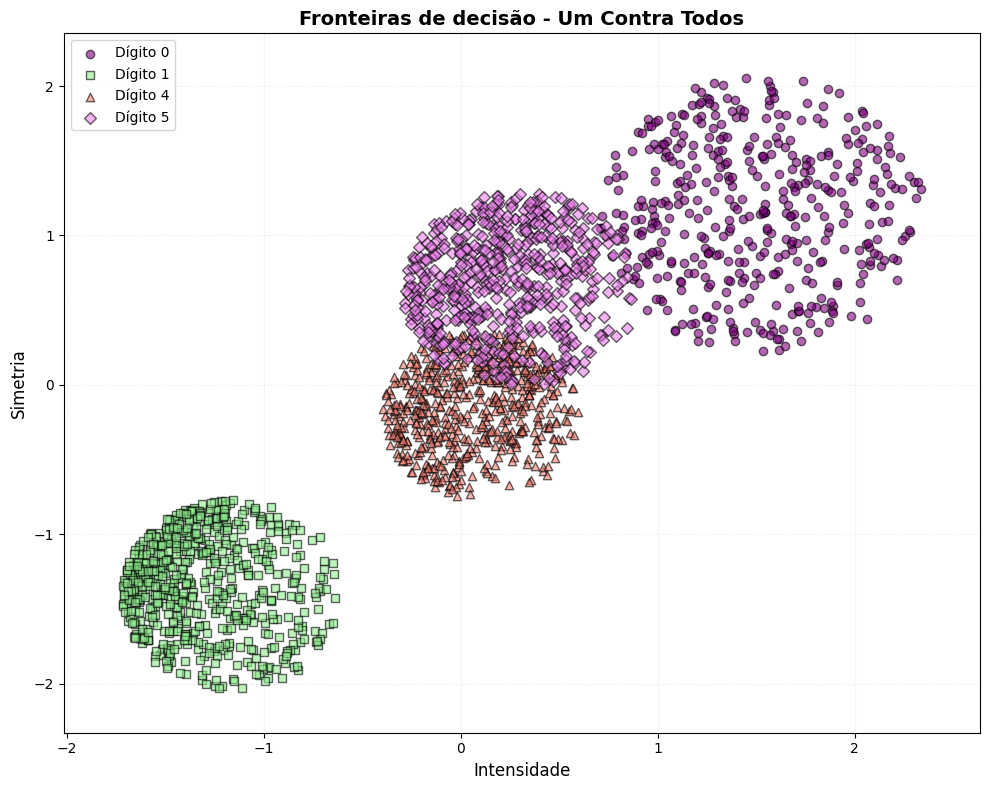

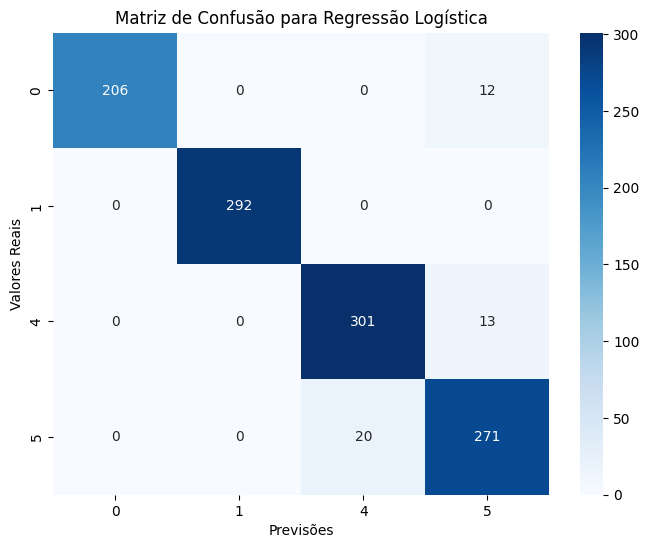

In [7]:
classificadores_logistica, previsoes_logistica = treinar_um_contra_todos(
    RegressaoLogistica, X_train_scaled, y_train, X_test_scaled, y_test
)

plot_um_contra_todos(classificadores_logistica, X_train_scaled, y_train, digitos_para_classificar)

cm = confusion_matrix(y_test, previsoes_logistica, labels=digitos_para_classificar)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=digitos_para_classificar, yticklabels=digitos_para_classificar)
plt.title('Matriz de Confusão para Regressão Logística')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()